# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

# Goals and Objectives
We want to find out if we can automate loan eligbility based on customer detailed provided from online application.

We are given Gender, Marital Status, Number of Dependents, Income, Coapplicant Income, Loan Amount, Loan Term, Credit History, Property Area and others. Using these variables, we try to use Machine Learning to predict whether or not the loan will be approved.

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

The use case of the loan. Let's say for business or education will have a higher chance of getting the loan rather than a personal loan.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [718]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../data/data.csv", sep = ',') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [719]:
df.shape

(614, 13)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [720]:
df.isnull().sum()
# Gender null values, could be non binary
# dependents null means they probably have 0
# can impute loan amount with mean/median
# credit history, probably 1 if loan approved, 0 if not approved

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [721]:
numeric = df.select_dtypes(include=np.number)
numeric.describe()
# dependents could potentially be numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [722]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [723]:
# 1
df.shape
df['Credit_History'].value_counts()
# 50 have null credit history

1.0    475
0.0     89
Name: Credit_History, dtype: int64

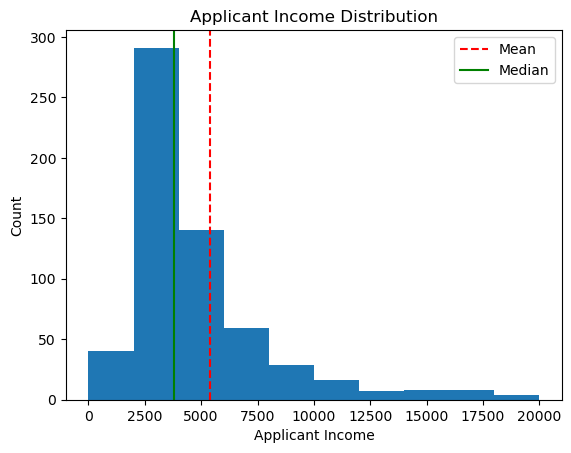

In [724]:
# there are some outliers for Applicant Income
mean = df['ApplicantIncome'].mean()
median = df['ApplicantIncome'].median()
plt.hist(df['ApplicantIncome'], bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000])
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Applicant Income Distribution')
plt.axvline(mean, color = 'r', linestyle='--')
plt.axvline(median, color = 'g', linestyle = '-')
plt.legend({'Mean': mean, 'Median': median})
plt.show()

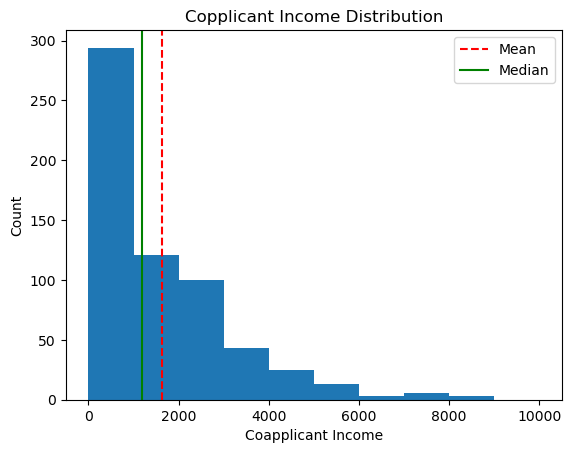

In [725]:
mean = df['CoapplicantIncome'].mean()
median = df['CoapplicantIncome'].median()
plt.hist(df['CoapplicantIncome'], bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')
plt.title('Copplicant Income Distribution')
plt.axvline(mean, color = 'r', linestyle='--')
plt.axvline(median, color = 'g', linestyle = '-')
plt.legend({'Mean': mean, 'Median': median})
plt.show()

In [726]:
# both graphs have right skewness
# could be because of small sample

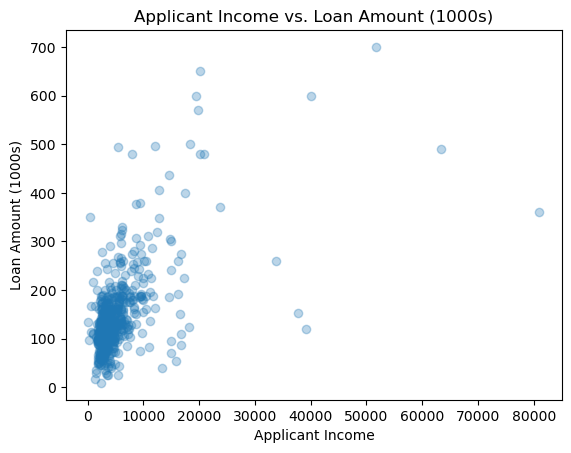

In [727]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], alpha= 0.3)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount (1000s)')
plt.title('Applicant Income vs. Loan Amount (1000s)')
plt.show()

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [728]:
df.shape
# 614 rows of data

(614, 13)

In [729]:
# nominal variables: Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [730]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [731]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [732]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [733]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [734]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [735]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

2-3 unique values per nominal category, excluding null values. For dependents there are 4 unique values.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

The frequency is interesting. There are some categories with values in 400-500 count across categories.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



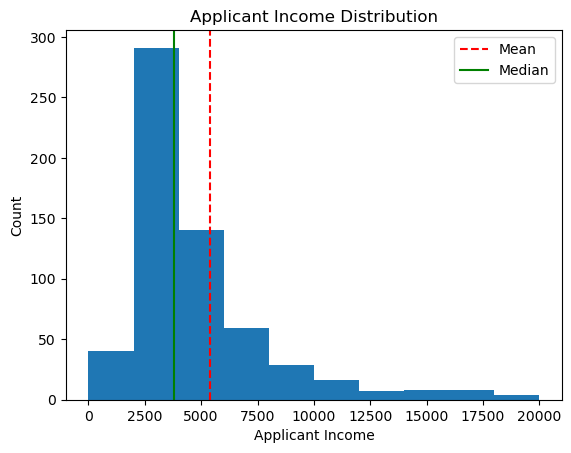

In [736]:
mean = df['ApplicantIncome'].mean()
median = df['ApplicantIncome'].median()
plt.hist(df['ApplicantIncome'], bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000])
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Applicant Income Distribution')
plt.axvline(mean, color = 'r', linestyle='--')
plt.axvline(median, color = 'g', linestyle = '-')
plt.legend({'Mean': mean, 'Median': median})
plt.show()

In [737]:
df[df['ApplicantIncome'] > 15000].shape
# There are 25 outliers if we get Applicant Income < 15000

(25, 13)

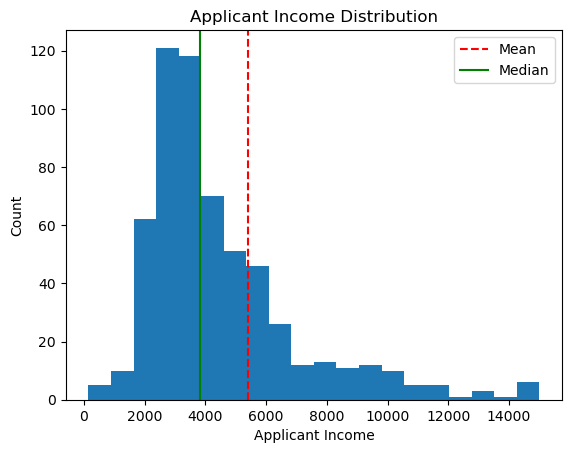

In [738]:
outliers_removed = df[df['ApplicantIncome'] < 15000]
mean = df['ApplicantIncome'].mean()
median = df['ApplicantIncome'].median()
plt.hist(outliers_removed['ApplicantIncome'], bins = 20)
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Applicant Income Distribution')
plt.axvline(mean, color = 'r', linestyle='--')
plt.axvline(median, color = 'g', linestyle = '-')
plt.legend({'Mean': mean, 'Median': median})
plt.show()
# there are outliers so the histogram looks weird


Look at box plots to understand the distributions. 

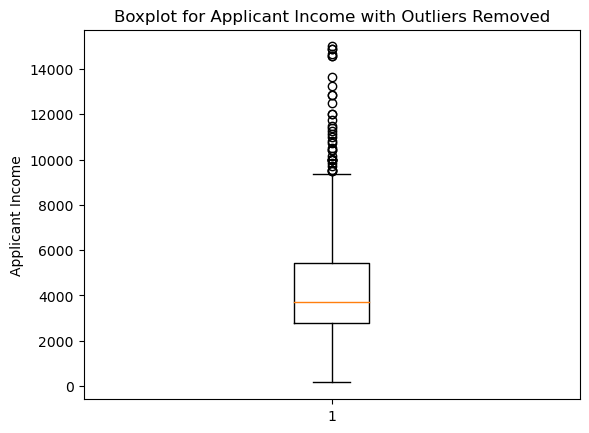

In [739]:
plt.boxplot(outliers_removed['ApplicantIncome'])
plt.title('Boxplot for Applicant Income with Outliers Removed')
plt.ylabel('Applicant Income')
plt.show()

Look at the distribution of income segregated  by `Education`

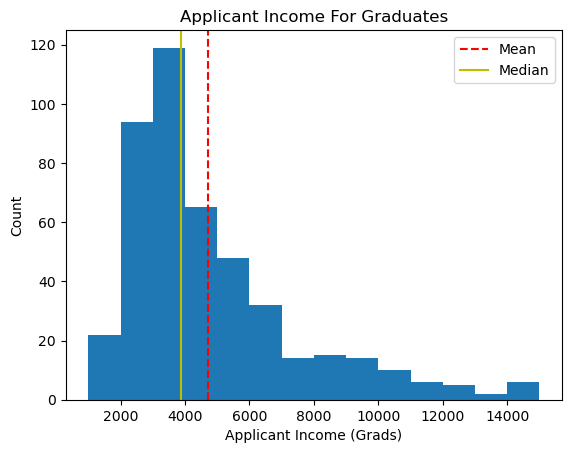

In [740]:
# make histograms for the distribution of Income
graduates = outliers_removed[outliers_removed['Education'] == 'Graduate']
mean = graduates['ApplicantIncome'].mean()
median = graduates['ApplicantIncome'].median()
plt.hist(graduates['ApplicantIncome'], bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000])
plt.xlabel('Applicant Income (Grads)')
plt.ylabel('Count')
plt.axvline(mean, color = 'r', linestyle='--')
plt.axvline(median, color = 'y', linestyle = '-')
plt.legend({'Mean': mean, 'Median': median})
plt.title('Applicant Income For Graduates')
plt.show()

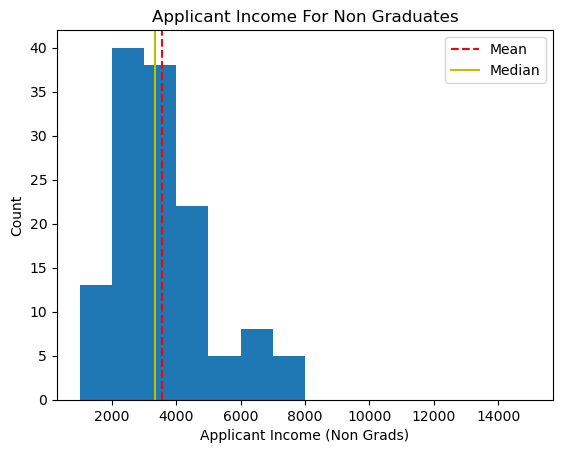

In [741]:
non_grads = outliers_removed[outliers_removed['Education'] == 'Not Graduate']
mean = non_grads['ApplicantIncome'].mean()
median = non_grads['ApplicantIncome'].median()
plt.hist(non_grads['ApplicantIncome'], bins= [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000])
plt.xlabel('Applicant Income (Non Grads)')
plt.ylabel('Count')
plt.title('Applicant Income For Non Graduates')
plt.axvline(mean, color = 'r', linestyle='--')
plt.axvline(median, color = 'y', linestyle = '-')
plt.legend({'Mean': mean, 'Median': median})
plt.show()
# lower mean/median for non grads

Look at the histogram and boxplot of LoanAmount

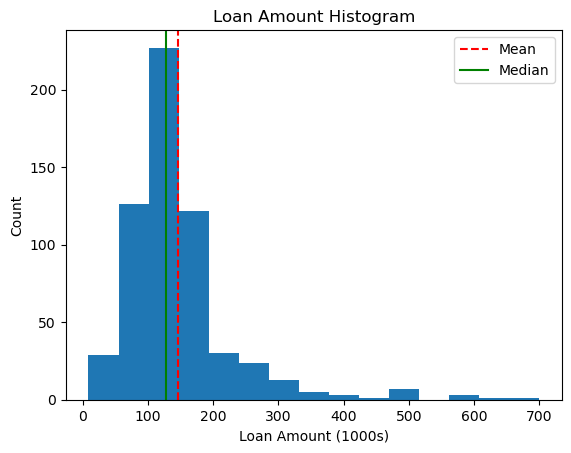

In [742]:
mean = df['LoanAmount'].mean()
median = df['LoanAmount'].median()
plt.hist(df['LoanAmount'], bins = 15)
plt.xlabel('Loan Amount (1000s)')
plt.ylabel('Count')
plt.title('Loan Amount Histogram')
plt.axvline(mean, color = 'r', linestyle='--')
plt.axvline(median, color = 'g', linestyle = '-')
plt.legend({'Mean': mean, 'Median': median})
plt.show()

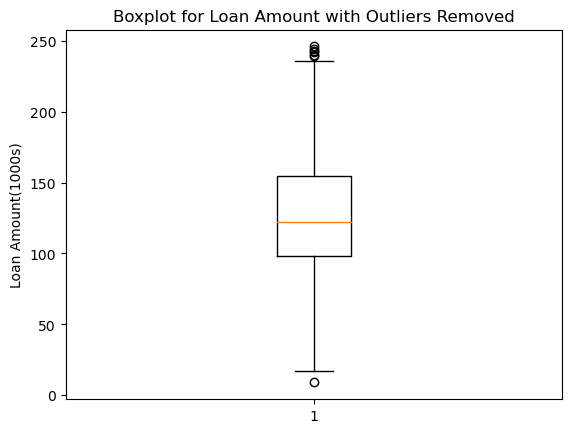

In [743]:
not_null = df[df['LoanAmount'].notnull()]
not_null_removed_outliers = not_null[not_null['LoanAmount'] < 250]
plt.boxplot(not_null_removed_outliers['LoanAmount'])
plt.title('Boxplot for Loan Amount with Outliers Removed')
plt.ylabel('Loan Amount(1000s)')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

In [744]:
df.nlargest(1, 'LoanAmount')
# 700000 loan is probably a mortgage with 300 month term
print(300/12)

25.0


In [745]:
df.nlargest(5, 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y


### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

<AxesSubplot:title={'center':'Mean Applicant Income by Gender, Education, and Marital Status'}, xlabel='Gender and Marriage Status', ylabel='Applicant Income'>

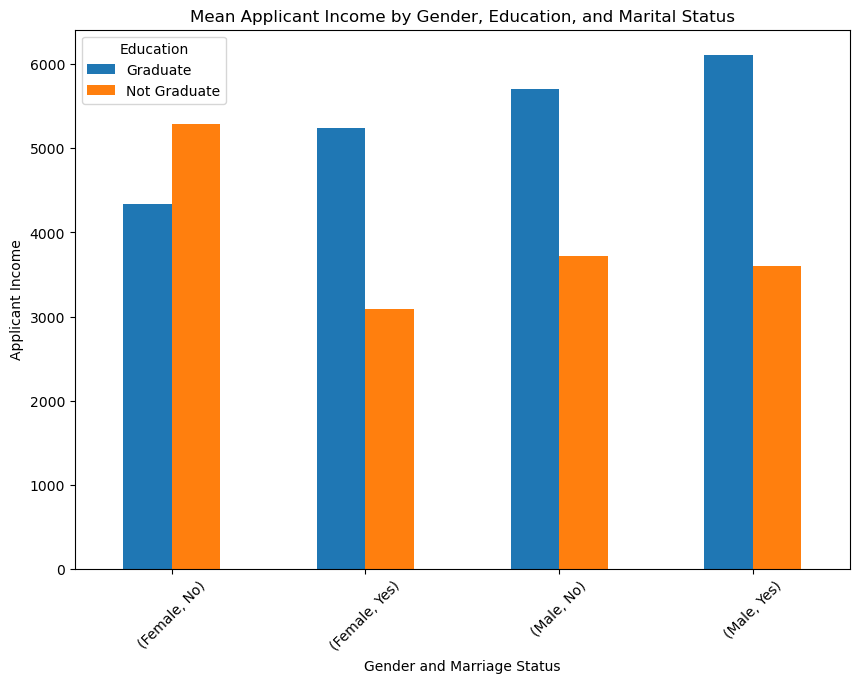

In [746]:
education = pd.pivot_table(df, values='ApplicantIncome', index =['Gender', 'Married'],
                                columns = ['Education'], aggfunc= np.mean).plot.bar(figsize=(10,7),
                                title = 'Mean Applicant Income by Gender, Education, and Marital Status',
                                xlabel = 'Gender and Marriage Status', rot=45, ylabel = 'Applicant Income')
education

In [747]:
counts = pd.pivot_table(df, values='ApplicantIncome', index =['Gender', 'Married'],
                                columns = ['Education'], aggfunc= [np.mean, 'count'])
counts

mean                 count             
Education          Graduate Not Graduate Graduate Not Graduate
Gender Married                                                
Female No       4337.196970  5289.142857       66           14
       Yes      5246.920000  3091.000000       25            6
Male   No       5710.777778  3720.387097       99           31
       Yes      6106.112727  3595.914634      275           82

Graduates generally have mean income, except for females and non married, could be attributed to sample size.

In [748]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


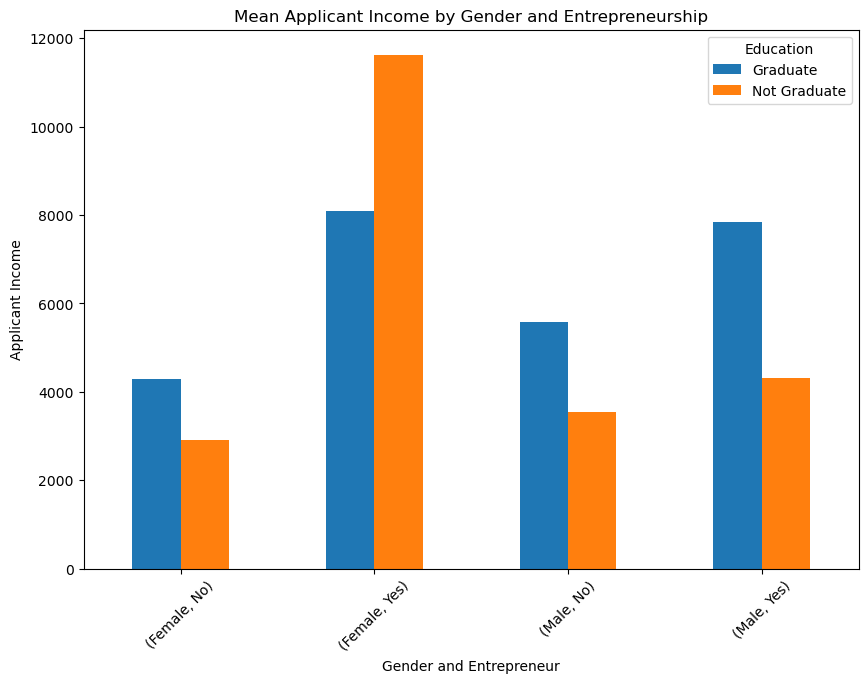

In [749]:
employment = pd.pivot_table(df, values='ApplicantIncome', index =['Gender', 'Self_Employed'],
                                columns = ['Education'], aggfunc= np.mean).plot.bar(figsize=(10,7),
                                title = 'Mean Applicant Income by Gender and Entrepreneurship',
                                xlabel = 'Gender and Entrepreneur', rot=45, ylabel = 'Applicant Income')

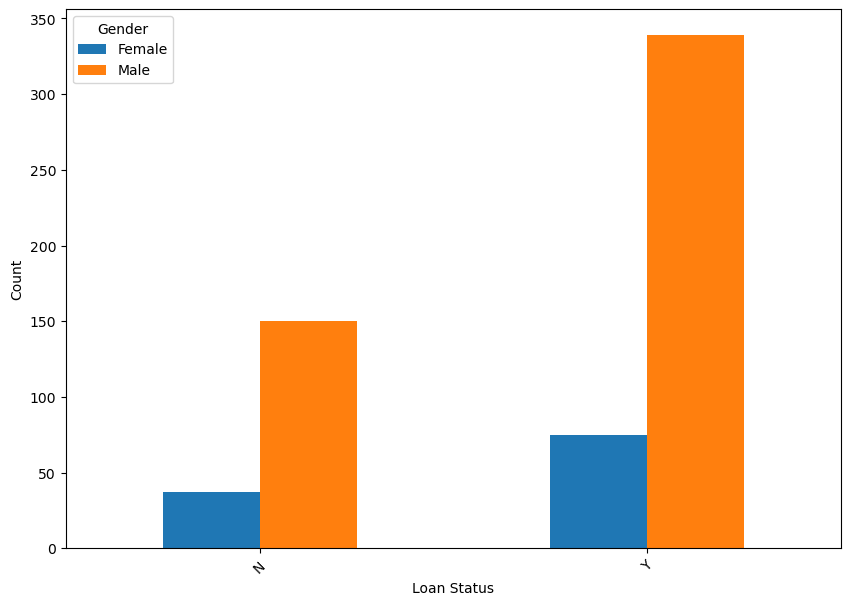

In [750]:
loan = pd.pivot_table(df, values='ApplicantIncome', index =['Loan_Status'],
                                columns = ['Gender'], aggfunc= 'count').plot.bar(figsize=(10,7),
                                title = '',
                                xlabel = 'Loan Status', rot=45, ylabel = 'Count')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [751]:
pipeline_df = df.copy()

In [752]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [753]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [754]:
# more likely there are more males
df['Gender'].fillna('Male', inplace = True)

In [755]:
# if they didn't fill it out probably means they aren't married
df['Married'].fillna('No', inplace=True)

In [756]:
# fill with the mode for dependents
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [757]:
# fill with no for self employed
df['Self_Employed'].fillna('No', inplace=True)

In [758]:
# if i have more time, I would figure out how to impute null values based on other columns
# lets say for Loan Term Amount get the means of each group where Long Term Loans are > 240 months, Medium is 240 - 180 months, Short < 120 months
# impute Loan Amount based on Loan Term
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [759]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [760]:
# since loan term amounts are usually fixed use median or mode rather than creating a new value with mean
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [761]:
# Would probably fill in the the Credit History with whether or not they got the Loan Approved
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [762]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Create Dummy Variables

In [763]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [764]:
y = df['Loan_Status']
df.drop('Loan_Status', axis=1, inplace=True)

In [765]:
id = df.drop('Loan_ID', axis =1, inplace=True)
df = pd.get_dummies(df)

In [766]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

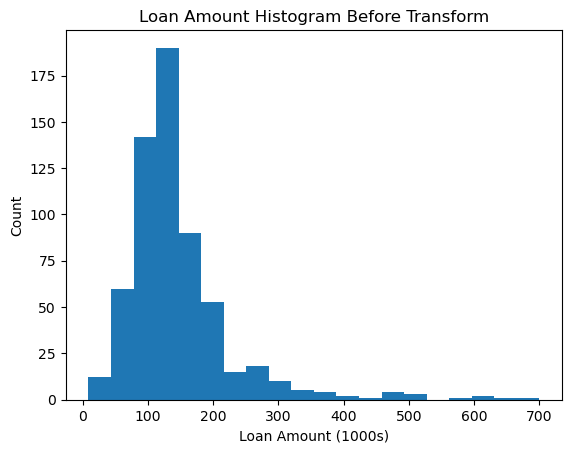

In [767]:
plt.hist(df['LoanAmount'], bins = 20)
plt.xlabel('Loan Amount (1000s)')
plt.ylabel('Count')
plt.title('Loan Amount Histogram Before Transform')
plt.show()

In [768]:
df['LoanAmount'] = np.log(df['LoanAmount'])

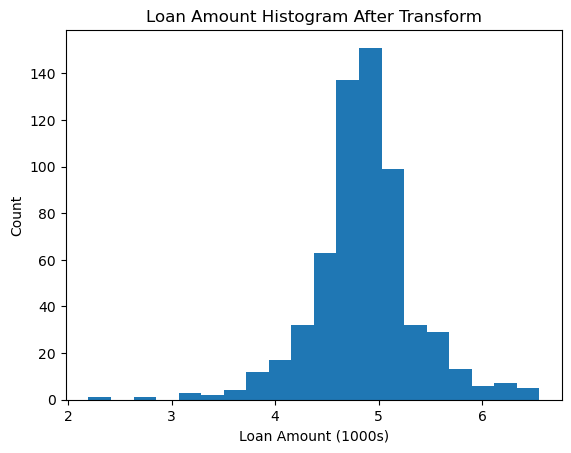

In [769]:
plt.hist(df['LoanAmount'], bins = 20)
plt.xlabel('Loan Amount (1000s)')
plt.ylabel('Count')
plt.title('Loan Amount Histogram After Transform')
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [770]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [771]:
pipeline_df['Total_Income'] = pipeline_df['ApplicantIncome'] + pipeline_df['CoapplicantIncome']

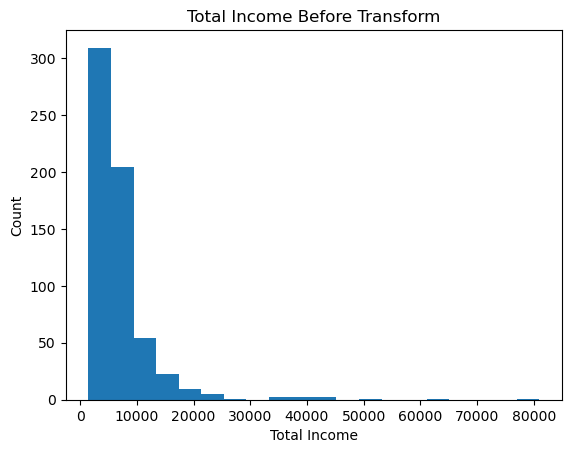

In [772]:
plt.hist(df['Total_Income'], bins = 20)
plt.xlabel('Total Income')
plt.ylabel('Count')
plt.title('Total Income Before Transform')
plt.show()

In [773]:
df['Total_Income'] = np.log(df['Total_Income'])

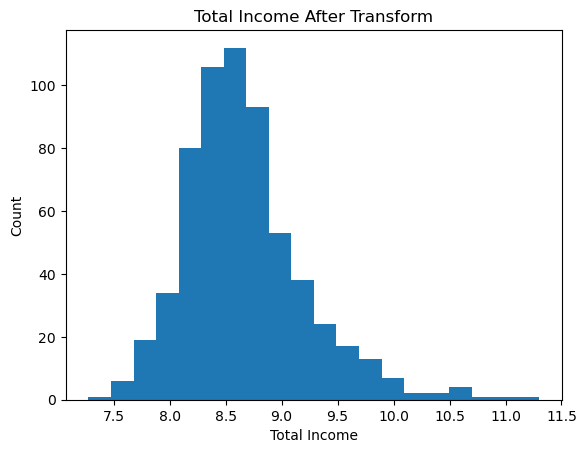

In [774]:
plt.hist(df['Total_Income'], bins = 20)
plt.xlabel('Total Income')
plt.ylabel('Count')
plt.title('Total Income After Transform')
plt.show()

## 4. Building a Predictive Model

In [775]:
# classification model to predict yes/no loan approval
# get the Data
X = df

# already have y

In [776]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [777]:
# scale the data
from sklearn.preprocessing import StandardScaler

In [778]:
# init classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# build pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('rand_forest', clf)])
pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

0.772972972972973

Try paramater grid search to improve the results

In [779]:
from sklearn.model_selection import GridSearchCV

params = {'rand_forest__max_depth': [1, 2, 3, 4],
            'rand_forest__min_samples_split': [2, 3, 4],
            'rand_forest__min_samples_leaf': [1, 2, 3]
}

# create gridsearch object
grid = GridSearchCV(pipeline, params, refit=True)

# fit the model and tune params
grid.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rand_forest',
                                        RandomForestClassifier())]),
             param_grid={'rand_forest__max_depth': [1, 2, 3, 4],
                         'rand_forest__min_samples_leaf': [1, 2, 3],
                         'rand_forest__min_samples_split': [2, 3, 4]})

In [780]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'rand_forest__max_depth': 4, 'rand_forest__min_samples_leaf': 1, 'rand_forest__min_samples_split': 4}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(max_depth=4, min_samples_split=4))])
0.8094762095161936


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [781]:
pipeline_df.drop('Loan_ID', axis=1, inplace=True)

In [782]:
pipeline_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0


In [783]:
pipeline_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [784]:
# group imputer for imputing based on another column
# if there is time can implement this
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.utils.validation import check_is_fitted

# class GroupImputer(BaseEstimator, TransformerMixin):
#     '''
#     Class used for imputing missing values in a pd.DataFrame using either mean,
#     median, or mode of a group.
    
#     Parameters
#     ----------    
#     group_cols : list
#         List of columns used for calculating the aggregated value 
#     target : str
#         The name of the column to impute
#     metric : str
#         The metric to be used for remplacement, can be one of ['mean', 'median', 'mode]
#     Returns
#     -------
#     X : array-like
#         The array with imputed values in the target column
#     '''
#     def __init__(self, group_cols, target, metric='mean'):
        
#         assert metric in ['mean', 'median', 'mode'], 'Unrecognized value for metric, should be mean/median'
#         assert type(group_cols) == list, 'group_cols should be a list of columns'
#         assert type(target) == str, 'target should be a string'
        
#         self.group_cols = group_cols
#         self.target = target
#         self.metric = metric
    
#     def fit(self, X, y=None):
        
#         assert pd.isnull(X[self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'
        
#         impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric) \
#                                                             .reset_index(drop=False)
        
#         self.impute_map_ = impute_map
        
#         return self 
    
#     def transform(self, X, y=None):
        
#         # make sure that the imputer was fitted
#         check_is_fitted(self, 'impute_map_')
        
#         X = X.copy()
        
#         for index, row in self.impute_map_.iterrows():
#             ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
#             X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])
        
#         return X.values

In [785]:
pipeline_df.isnull().sum()
pipeline_df.drop('Loan_Status', axis = 1, inplace = True)

In [902]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

categorical_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'most_frequent')),
                                          ('encoder', OneHotEncoder(handle_unknown='ignore'))])

numeric = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'most_frequent'))])

preprocessor = ColumnTransformer(
       transformers= [('num', numeric_transformer, numeric),
                     #  ('log', FunctionTransformer(np.log), ['LoanAmount', 'Total_Income']),
                      ('cat', categorical_transformer, categorical_feats)]
)
# scale and log causing problems when using column transformer, because they run in parallel


In [903]:
# get data

X = pipeline_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [906]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("rand_forest", RandomForestClassifier())]
)

In [907]:
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

c:\Users\jared\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\impute\_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


0.7783783783783784

In [909]:
params = {'rand_forest__max_depth': [1, 2, 3, 4],
            'rand_forest__min_samples_split': [2, 3, 4],
            'rand_forest__min_samples_leaf': [1, 2, 3]
}

# create gridsearch object
grid = GridSearchCV(clf, params, refit=True)

# fit the model and tune params
grid.fit(X,y)

c:\Users\jared\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\impute\_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\jared\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\impute\_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Credit_History',
                                                                          'Total_Income']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area'])])),
                                       ('rand_forest',
                                        RandomForestClassifier())]),
             param_grid={'rand_forest__max_depth': [1, 2, 3, 4],
                         'rand_forest__min_samples_leaf': [1, 2, 3],
                         'rand_forest__min_samples_split': [2, 3, 4]})

In [910]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'rand_forest__max_depth': 4, 'rand_forest__min_samples_leaf': 2, 'rand_forest__min_samples_split': 4}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'Total_Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   

In [912]:
# import pickle
import pickle
filename = '../data/trained_model.p'
pickle.dump(grid, open(filename, 'wb'))

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [978]:
import json
pipeline_df.loc[0].to_json("../data/row{}.json".format(0))
# data_json = pipeline_df.iloc[0].reset_index().to_json(orient='records')
# data_json
# pipeline_df

In [991]:
import requests

my_json = {"Gender":"Male", 
"Married":"No",
"Dependents":"0",
"Education":"Graduate",
"Self_Employed":"No",
"ApplicantIncome":5849,
"CoapplicantIncome":0.0,
"LoanAmount":10,
"Loan_Amount_Term":360.0,
"Credit_History":1.0,
"Property_Area":"Urban",
"Total_Income":5849.0}

URL = "http://127.0.0.1:5002/predict"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = my_json) 

In [992]:
print(r.json())

['Y']
